In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno 

In [33]:
df = pd.read_csv('card_data.csv')
df = df.dropna(subset=['ATK']) 
df=df.drop("Type",1)
df=df.drop("Attribute",1)
df.head()

,Name,Level,Race,ATK,DEF
1,The 13th Grave,3.0,Zombie,1200.0,900.0
4,Castle of Dark Illusions,4.0,Fiend,920.0,1930.0
6,Lava Golem,8.0,Fiend,3000.0,2500.0
8,Seismic Crasher,3.0,Rock,1400.0,300.0
9,Laval Lancelord,6.0,Warrior,2100.0,200.0


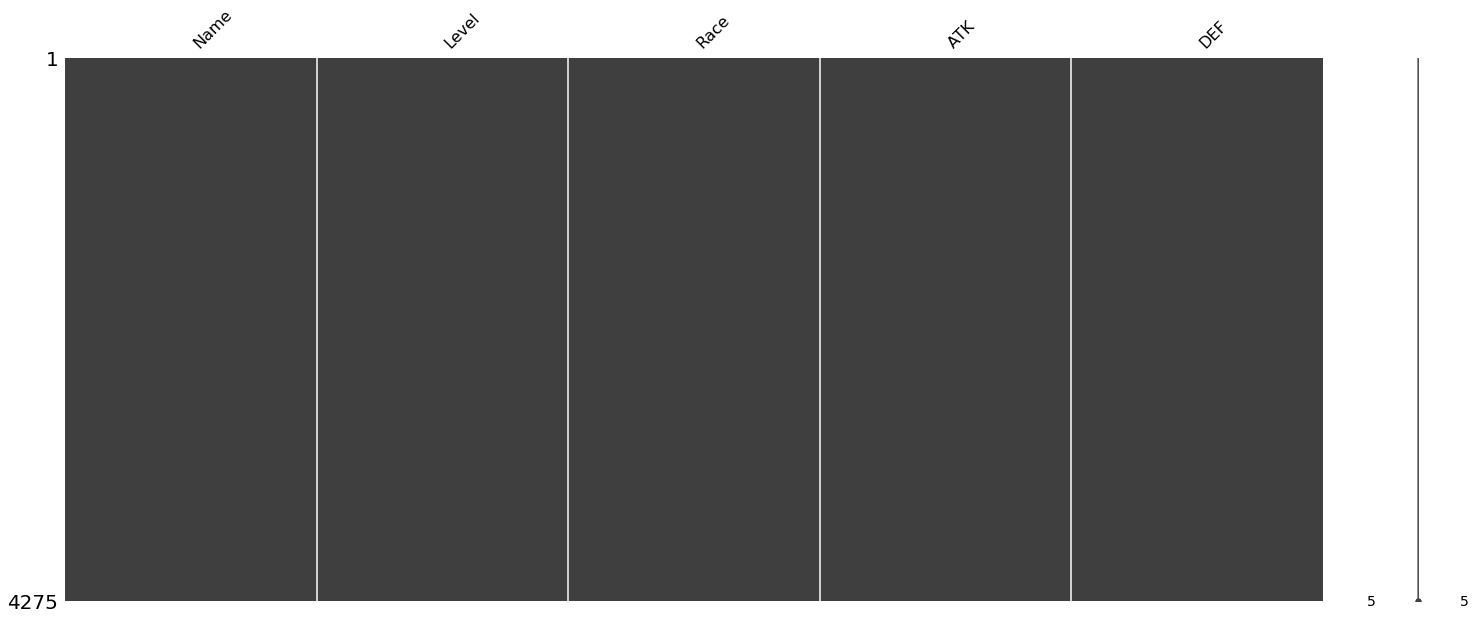

In [34]:
msno.matrix(df)

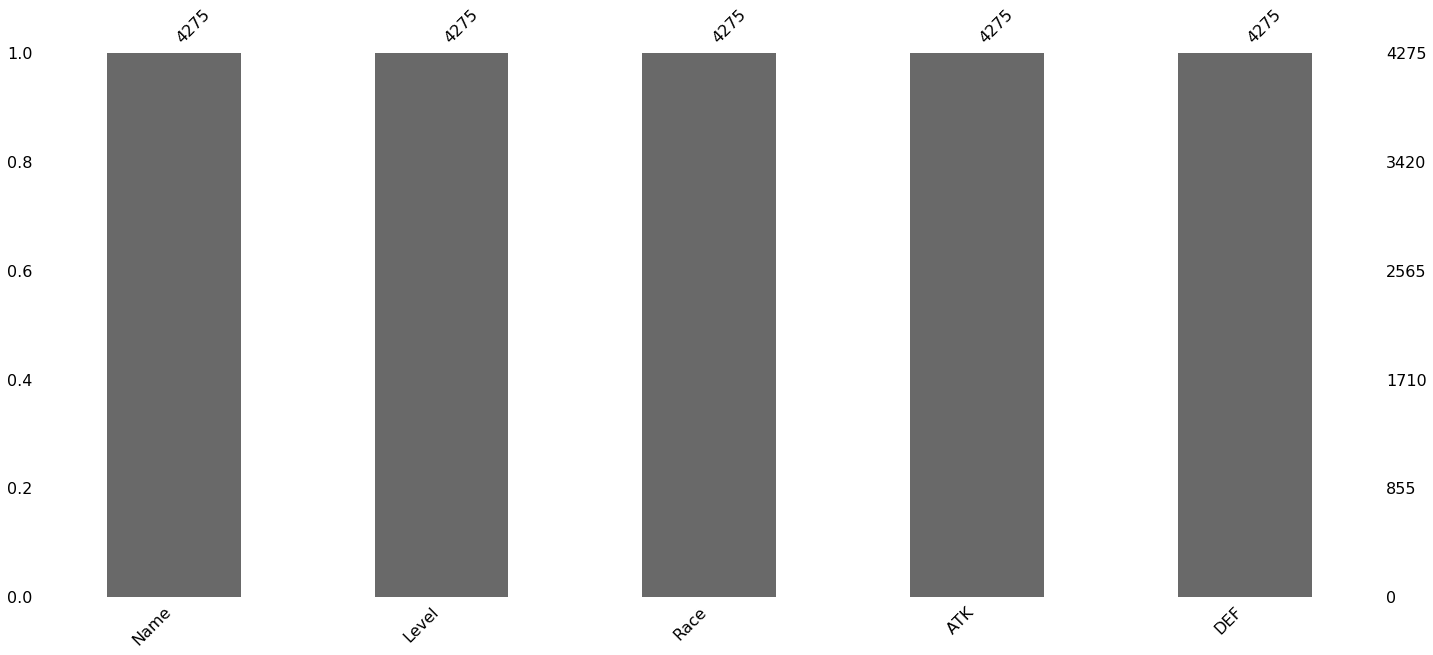

In [35]:
msno.bar(df)

In [37]:
items = (df["Race"].unique())
items

array(['Zombie', 'Fiend', 'Rock', 'Warrior', 'Winged Beast',
       'Spellcaster', 'Beast', 'Fairy', 'Fish', 'Beast-Warrior',
       'Thunder', 'Machine', 'Sea Serpent', 'Aqua', 'Plant', 'Dragon',
       'Reptile', 'Psychic', 'Insect', 'Pyro', 'Dinosaur', 'Wyrm',
       'Divine-Beast', 'Cyberse'], dtype=object)

In [38]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [39]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Reptile,Rock,Machine,Fairy,Warrior,Dragon,Pyro,Winged Beast,Wyrm,Fiend,...,Dinosaur,Thunder,Spellcaster,Beast,Divine-Beast,Aqua,Beast-Warrior,Cyberse,Plant,Zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
freq_items = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)
freq_items.head()

Processing 420 combinations | Sampling itemset size 2


,support,itemsets
0,0.024795,(Reptile)
1,0.034386,(Rock)
2,0.118596,(Machine)
3,0.057778,(Fairy)
4,0.139415,(Warrior)


In [44]:
freq_items.itemsets.unique()

array([frozenset({'Reptile'}), frozenset({'Rock'}),
       frozenset({'Machine'}), frozenset({'Fairy'}),
       frozenset({'Warrior'}), frozenset({'Dragon'}), frozenset({'Pyro'}),
       frozenset({'Winged Beast'}), frozenset({'Fiend'}),
       frozenset({'Sea Serpent'}), frozenset({'Insect'}),
       frozenset({'Psychic'}), frozenset({'Fish'}),
       frozenset({'Dinosaur'}), frozenset({'Thunder'}),
       frozenset({'Spellcaster'}), frozenset({'Beast'}),
       frozenset({'Aqua'}), frozenset({'Beast-Warrior'}),
       frozenset({'Plant'}), frozenset({'Zombie'})], dtype=object)